In [12]:
# 🧪 Exploratory Data Analysis - Disney+
#This notebook performs a deep dive into the Disney+ dataset using Python libraries like Pandas, Matplotlib, and Seaborn.


In [13]:
## 2. Data Cleaning Summary
#We cleaned the dataset by:
#- Converting `date_added` to datetime
#- Filling missing values in `director`, `cast`, `country`, and `rating`
#- Extracting `duration_minutes` and `seasons` from `duration`


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
os.makedirs('visuals', exist_ok=True)  # Create the folder if it doesn't exist

warnings.filterwarnings('ignore')

# Load data with 'duration' column
df = pd.read_csv(r'C:\Users\camro\OneDrive\Github Project1\data\disney_plus_titles.csv')

# Handle missing and date values
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

# Create new columns for duration and seasons
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in str(x) else None)
df['seasons'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' in str(x) else None)

# Drop original 'duration' column
df.drop(columns=['duration'], inplace=True)

# Quick look at the data
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,seasons
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,"Animation, Family",Join Mickey and the gang as they duck the halls!,23.0,NaN
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Unknown,2021-11-26,1988,PG,Comedy,Santa Claus passes his magic bag to a new St. ...,91.0,NaN
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,23.0,NaN
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Unknown,2021-11-26,2021,TV-PG,Musical,"This is real life, not just fantasy!",41.0,NaN
4,s5,TV Show,The Beatles: Get Back,Unknown,"John Lennon, Paul McCartney, George Harrison, ...",Unknown,2021-11-25,2021,Not Rated,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,NaN,1.0


In [15]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description',
       'duration_minutes', 'seasons'],
      dtype='object')


In [16]:
##4. Summary Statistics
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,seasons
count,1450,1450,1450,1450,1450,1450,1447,1450.000000,1450,1450,1450,1052.000000,398.000000
unique,1450,2,1450,610,1194,90,NaN,NaN,10,329,1448,NaN,NaN
top,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,Unknown,Unknown,United States,NaN,NaN,TV-G,"Animation, Comedy, Family","Cooper and Cami Wrather co-host ""Would You Wra...",NaN,NaN
freq,1,1052,1,473,190,1005,NaN,NaN,318,124,2,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22 01:54:26.620594176,2003.091724,NaN,NaN,NaN,71.910646,2.118090
min,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01 00:00:00,1928.000000,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-12 00:00:00,1999.000000,NaN,NaN,NaN,44.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-12 00:00:00,2011.000000,NaN,NaN,NaN,85.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-26 00:00:00,2018.000000,NaN,NaN,NaN,98.000000,2.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-26 00:00:00,2021.000000,NaN,NaN,NaN,183.000000,32.000000


In [17]:
### 🟦 Content Type Distribution##

#This chart compares the number of **Movies** and **TV Shows** available on Disney+.

#📌 **Insight**: 
#Disney+ heavily features movies, far outnumbering TV shows. 
#This reflects the company’s rich history of animated and blockbuster films that form the core of its content strategy.


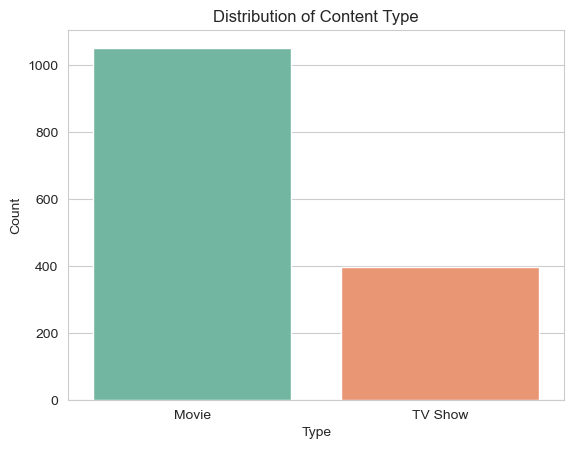

In [18]:
#5. Content Type Distribution
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig('visuals/filename.png')
plt.show()


In [19]:
##Content Added Over the Years##

#📊 Insight:
#Disney+ saw a massive spike in content additions in 2019, which aligns with the platform’s official launch in November 2019. 
#After the launch year, additions dropped in 2020 and 2021, 
#likely due to a mix of initial content backlog being uploaded in 2019 and pandemic-related production slowdowns in the following years.
#Years before 2019 show nearly no additions, confirming that most content was released around or after the launch window.

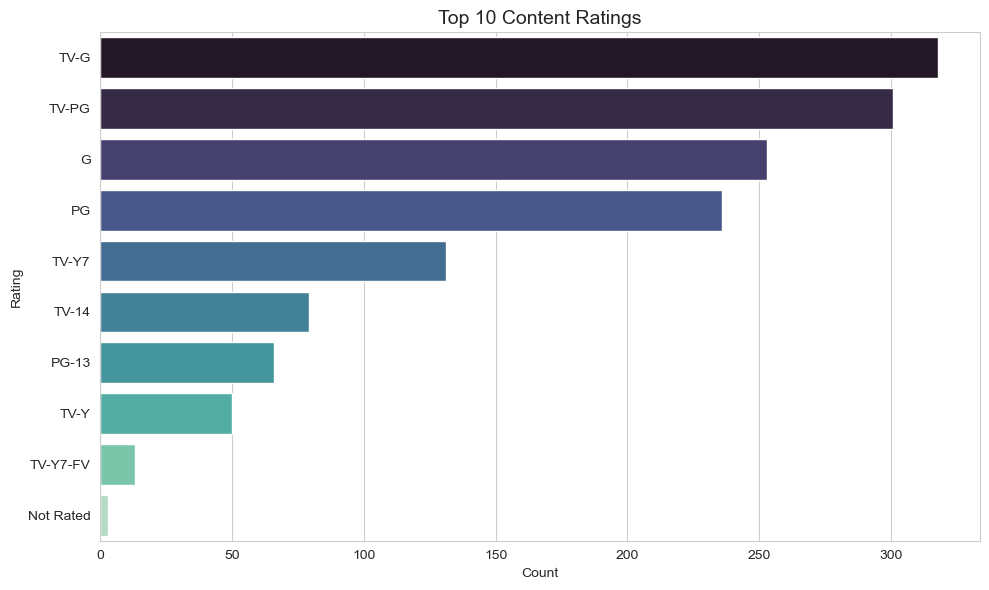

In [20]:
#6. Ratings Breakdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("cleaned_disney_plus_titles.csv")

# Count the top 10 most common content ratings
top_ratings = df['rating'].value_counts().head(10)

# Set up the visual style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette="mako")

# Add titles and labels
plt.title("Top 10 Content Ratings", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()

# Show plot
plt.show()


In [21]:
### 🟨 Top 10 Countries by Content Count
#This chart displays the countries contributing the most content to Disney+.

#📌 **Insight**: 
#The **United States** leads by a wide margin. 
#Some country fields contain mixed or unknown values, suggesting that a deeper parsing or cleaning step could improve regional content analysis.


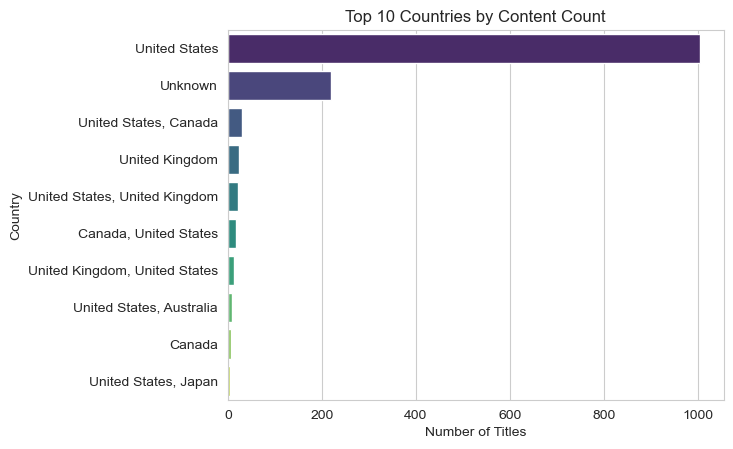

In [22]:
#7. Country-wise Content
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.savefig('visuals/filename.png')
plt.show()


In [23]:
### 🟩 Content Added Over Time
#This line plot shows the number of titles added to Disney+ each year based on their `date_added` field.

#📌 **Insight**:
#A huge spike occurred in **2019**, aligning with Disney+’s launch. Fewer titles were added in subsequent years, 
#likely due to a shift in focus from quantity to strategic content releases.


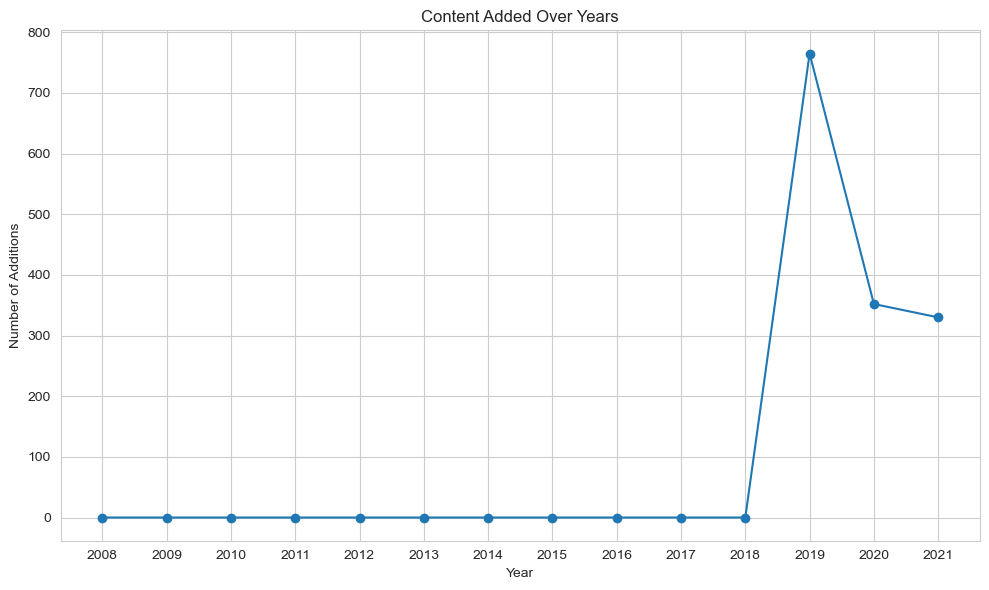

In [36]:
#8. Content Added Over Time

import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("cleaned_disney_plus_titles.csv")
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
content_by_year = df['date_added'].dt.year.value_counts().sort_index()

# Ensure all years from 2008 onward are included
start_year = 2008
end_year = int(content_by_year.index.max())
years = list(range(start_year, end_year + 1))
content_by_year = content_by_year.reindex(years, fill_value=0)

# Plot with clean x-axis ticks
plt.figure(figsize=(10, 6))
plt.plot(content_by_year.index, content_by_year.values, marker='o')
plt.xticks(ticks=years)  # Force clean integer x-axis
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Additions')
plt.grid(True)
plt.tight_layout()
plt.savefig('content_added_over_years.png')
plt.show()


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load cleaned dataset
df = pd.read_csv('cleaned_disney_plus_titles.csv')

# Convert to datetime and create year column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year